# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/Users/mifryar/anaconda3/envs/MLND/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mifryar/anaconda3/envs/MLND/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [29]:
# Note: The instructions suggest using numpy but I have used pandas

# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Add summary stats for features

# Mean and standard deviation of number of rooms
mean_rooms = features['RM'].mean()
std_rooms = features['RM'].std()

# Mean and standard deviation of percentage of working-class neighbors
mean_lstat = features['LSTAT'].mean()
std_lstat = features['LSTAT'].std()

# Mean and standard deviation of pupil-teacher ratio
mean_ptratio = features['PTRATIO'].mean()
std_ptratio = features['PTRATIO'].std()

# Show the calculated statistics
# (Format to two decimal places and add comma separators)
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

print("\n")
print("Mean of rooms: {:,.2f}".format(mean_rooms))
print("Standard deviation of rooms: {:,.2f}".format(std_rooms))
print("Mean percentage of working-class neighbors: {:,.2f}".format(mean_lstat))
print("Standard deviation percentage of working-class neighbors: {:,.2f}".format(std_lstat))
print("Mean pupil-teacher ratio: {:,.2f}".format(mean_ptratio))
print("Standard deviation pupil-teacher ratio: {:,.2f}".format(std_ptratio))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


Mean of rooms: 6.24
Standard deviation of rooms: 0.64
Mean percentage of working-class neighbors: 12.94
Standard deviation percentage of working-class neighbors: 7.08
Mean pupil-teacher ratio: 18.52
Standard deviation pupil-teacher ratio: 2.11


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

* `'RM'`: I expect `'RM'` to be **positively** correlated with `'MDEV'`.
    - That is, I expect that a home that has a `'RM'` value (number of rooms) of 6 would be worth **less** than a home that has an `'RM'` value of 7.
    - *All else equal*, homes with more rooms should command higher prices since what homebuyers are ultimately paying for is space.
    
* `'LSTAT'`: I expect `'LSTAT'` to be **negatively** correlated with `'MDEV'`.
    - That is, I expect that a neighborhood that has an `'LSTAT'` value (percent of working class residents) of 15 would have home prices worth **more** than a neighborhood that has an `'LSTAT'` value of 20.
    - *All else equal*, homebuyers are willing to pay more to live in neighborhoods with fewer working class residents. This is because those who live in neighborhoods with a larger percentage of working class residents have worse economic, educational, and health outcomes than those who live in neighborhoods with a lower percentage of working class residents. (Chetty, Raj, Nathaniel Hendren, and Lawrence Katz. 2016. “The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Project.” American Economic Review 106 (4).)
    
* `'PTRATIO'`: I expect `'PTRATIO'` to be **negatively** correlated with `'MDEV'`.
    - That is, I expect that a neighborhood that has an `'PTRATIO'` value (ratio of students to teachers) of 15 would have home prices worth **more** than a neighborhood that has an `'PTRATIO'` value of 20.
    - *All else equal*, homebuyers with children are willing to pay more to live in neighborhoods where their children will attend schools with low pupil-teacher ratios. (Homebuyers without children are likely to be indifferent leading to a positive overall impact on price.) This is because of the belief that lower pupil-teacher ratios lead to better educational outcomes, a belief that is supported by a modest base of evidence. (Chingos, Matthew and Grover Whitehurst. 2011. "Class Size: What research says and what it means for state policy." Washington, DC: Brown Center on Education Policy at the Brookings Institution. Retrieved May 21, 2016. [Source](http://www.brookings.edu/research/papers/2011/05/11-class-size-whitehurst-chingos))

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

I would consider this model to have **successfully captured** the variation of the target variable. The R2 score of 0.923 indicates that **92.3% of the variance in the target variable can be explained by the features of the model.**

Although explaining more than 90% of the variation is exceptional, it would help to have additional information in order to determine whether this can be deemed a "success" for the context at hand. It is conceivable that certain applications may require models with even more explanatory power.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
# random_state is equal to the year Boston was founded
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1630)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:**

Splitting a dataset into training and testing subsets helps to prevent overfitting and underfitting.

By reserving 20 percent of the data for the testing set, we make it less likely that the algorithm will overfit. **If too small of a percentage of the data were allocated to the testing set, it would be more likely that the algorithm would fail to accurately predict new data** even if it had learned to predict the training set with a high degree of accuracy.

By using 80 percent of the data for the training set, we reduce the chances that the algorithm will underfit. **If too small of a percentage of the data were allocated to the training set, it would be more likely that the algorithm would underestimate the complexity of new data** even if it captured the variation in the training set.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

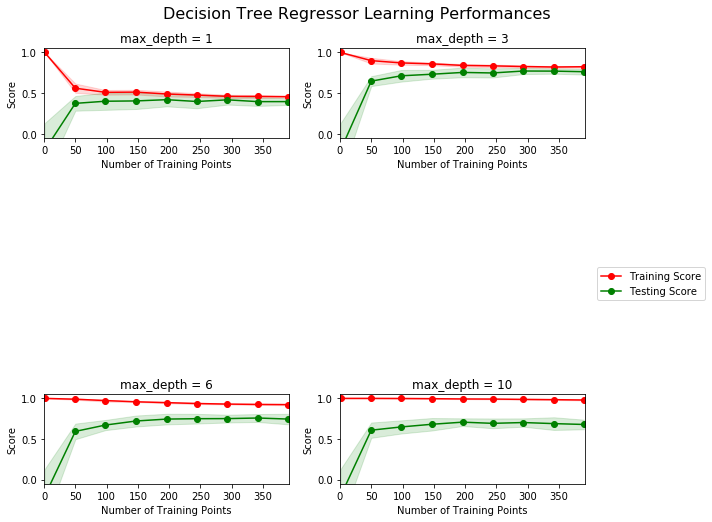

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**

Let's examine the learning curve where `max_depth = 3`.

The **training curve starts at a value of 1.0** when there is only a single training point. This makes sense—any model can predict a single point perfectly. **As more points are added, the training score begins to decrease** but remains relatively high. Again, it makes sense that the score would decrease as more points are added because attempting to predict more than one point will almost always result in some error. However, the fact that the score stays high (compared to the model with `max_depth = 1`) is an indication that it is not underfitting. **Beyond 250 training points, the training score remains nearly constant** around 0.8.

The **testing curve starts at a value of 0.0** when there is only a single training point. As before, this is logical. Any model trained on a single point will be unable to predict any new data that is not identical to the training point. **As more points are added, the testing score begins to increase** relatively quickly. It is intuitive that as more points are added to the training set, the model will be better able to predict new data. It is worth noting, however, that the rapid increase in testing score (compared to the models with `max_depth = 6` and `max_depth = 10`) is an indication that it is not overfitting. **Beyond 250 training points, the testing score remains nearly constant** around 0.8.

**Having more than 300 training points seems to offer no practical benefit to this model.** Once the model has 150 training points, adding additional training points leads to very little change in the training and testing scores. **Beyond 250 training points, the two curves converge to a score of about 0.8.**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

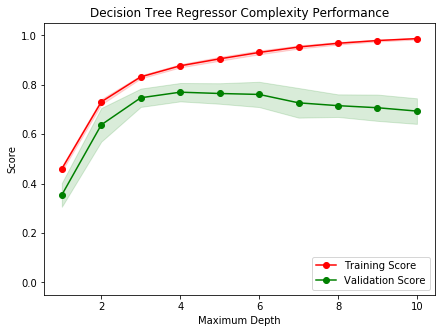

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?


** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**
- When a model is trained with a **maximum depth of 1, it suffers from high bias.** This can be seen in the low score for both training and validation. This indicates the model is overly simplistic. Because it is not picking up the nuances in either the training or the testing data, there is a high degree of bias when the model is applied to each.
- When a model is trained with a **maximum depth of 10, it suffers from high variance.** This is indicated by the fact that it has a very high (near 1.0) training score but a validation score that is not only significantly lower than the training score but actually worse than validation score of simpler models. This suggests that the model has learned to be overly sensitive to variations in the training data that likely represent random noise. As a result, it does not generalize well to new data, resulting in a relatively low validation score and a sizable gap between the training score and the validation score. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer:**

A model with **maximum depth of 4 seems to generalize best to unseen data.** Visually, we can see that **this is the point where the validation score curve reaches its peak.** Models with depth less than 4 *and* models with depth greater than 4 all perform worse when trying to predict unseen data. Even if the validation scores increased very slightly beyond a depth of 4, as the hint noted, Occams Razor would suggest that depth 4 would still be the best model.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**

**The grid search technique is a method for determining which hyperparameter values lead to the best model.**

When training a learning algorithm, **hyperparameters are values which are determined before the learning begins.** For example, the maximum degree of a polynomial regression or the maximum depth of a decision tree.

The grid search technique (also known as a parameter sweep) compares the performance of models with different combinations of hyperparameters. More specifically, the **grid search takes a specified subset of the hyperparameter space** (that is, all the unique combinations of hyperparameters) **and calculates their score on a model evaluation metric** (such as a cross-validation score) **in order to determine which combination of hyperparameters performs best.**

To see how it can be applied to optimize a learning algorithm, consider a SVM model where you're considering two possible kernels (linear or RBF) and two possible regularization contants C (10 or 100). Your goal in optimizing is to choose the combination of hyperparameters that produces a model with the highest $F_1$ score.

The "grid" would be 2 x 2 with each row representing one of the kernel values and each column representing one of the values of C. Each grid cell then would specify a model with a unique combination of hyperparameters and would be filled in with the $F_1$ score for that model. The "search" would compare of all the values in the grid to determine which combination of hyperparameters performed best.

If we only had a single hyperparameter, we could still imagine searching through a one-dimensional "grid" (a single column). And if we have more than two hyperparameters, each row or column could represent unique combinations of multiple hyperparameters.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

The k-fold cross-validation training technique is a method in which **the training set is divided into *k* equal-sized subsets.** The model is then **trained *k* times, each time using a different one of the subsets as the validation set and the remaining *k-1* subsets as the training set.**

When grid search uses a cross-validation score to determine the optimal set of hyperparameters, it is potentially sensitive to the choice of validation set. **Using k-fold cross-validation increases robustness by comparing models across *k* validation sets.**

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { 'max_depth': list(range(1,11)) }

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [19]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model has `max_depth = 4`. This agrees with my guess in Question 6!

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [20]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,000.00
Predicted selling price for Client 2's home: $200,982.35
Predicted selling price for Client 3's home: $932,018.18


**Answer: **

Based on our model, I would recommend the following selling prices:
* **Client 1: $411,000**

* **Client 2: $201,000**

* **Client 3: $932,000**

The prices seem reasonable given the respective features.
* The recommended price for Client 1 is slightly below the average price of $454,000. This makes sense given that their home that is just slightly worse than average in terms of number of rooms (5 vs 6.2), neighborhood poverty-level (17 vs 13), though the student-teacher ratio of nearby schools is slightly better than average (15 vs 18.5).

* The recommended price for Client 2 is lower than the price of a home one standard deviation below average ($289,000). However, their home is also more than one standard deviation worse than average for all features.

* The recommended price for Client 3 is higher than the price of a home one standard deviation above average ($619,000). However, their home is also more than one standard deviation better than average for all features.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [30]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


In [48]:
# Calculate trials summary stats for all 10 trials
trials = np.array(
    [391183.33,
     419700.00,
     415800.00,
     420622.22,
     418377.27,
     411931.58,
     399663.16,
     407232.00,
     351577.61,
     413700.00])

trials_drop_outlier = np.delete(trials,8)

print("Statistics for model trials:\n")
print("Min price (10 trials): ${:,.2f}".format(trials.min()))
print("Max price (10 trials): ${:,.2f}".format(trials.max()))
print("Mean of price (10 trials): ${:,.2f}".format(trials.mean()))
print("Standard deviation of price (10 trials): ${:,.2f}".format(trials.std()))
print("\n")
print("Statistics for model trials without outlier:\n")
print("Min price (9 trials): ${:,.2f}".format(trials_drop_outlier.min()))
print("Max price (9 trials): ${:,.2f}".format(trials_drop_outlier.max()))
print("Mean of price (9 trials): ${:,.2f}".format(trials_drop_outlier.mean()))
print("Standard deviation of price (9 trials): ${:,.2f}".format(trials_drop_outlier.std()))

Statistics for model trials:

Min price (10 trials): $351,577.61
Max price (10 trials): $420,622.22
Mean of price (10 trials): $404,978.72
Standard deviation of price (10 trials): $19,894.18


Statistics for model trials without outlier:

Min price (9 trials): $391,183.33
Max price (9 trials): $420,622.22
Mean of price (9 trials): $410,912.17
Standard deviation of price (9 trials): $9,364.54


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to consider answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of appliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

Although the constructed model has its limitations, **it can still be useful in a real-world setting.** The constructed model is not perfect, but no model ever is. We create models is to serve as guides for navigating the messiness of the real world. In order to be any help, they must abstract away from some details so that others can come into clearer focus. However, **it is essential to remember the context of the data used to train the model when trying to determine its usefulness in predicting data from new contexts.**

More recent data would obviously be preferable but imperfect data are better than no data. Inflation is important, which is why prices in the dataset have been multiplicatively scaled to adjust for inflation. Moreover, the key features are likely to be relatively stable over time. Each year some old homes are torn down and some new homes are built but, as of 2011, [nearly half of homes in the U.S. were still ones that had been built before 1970](https://www.census.gov/content/dam/Census/programs-surveys/ahs/working-papers/Housing-by-Year-Built.pdf). Neighborhood poverty levels show a very high degree of continuity. (Sharkey, P. 2008. "The intergenerational transmission of context." American Journal of Sociology, 113, 931–969.) And while 1978 was part of a somewhat extraordinary period for Boston Public Schools of court-ordered desegration through busing, if the homes in the dataset are in suburbs outside of Boston and therefore outside of Boston Public Schools, it is likely that neighborhood differences in school quality have persisted. 

The three features in the data explain nearly 75% of the variation in price when presented with new data. This suggests that they are sufficient to describe a home. The quality of appliances in the home is likely correlated with neighborhood poverty levels and the square feet of the plot are is likely highly correlated with the number of rooms. If these two features, as well as the presence of a pool were available, it would be worth factoring them in but their absence does not mean the model is not useful. And since houses are inextricably connected to particular neighborhoods, it does seem logical to consider neighborhood-level characteristics when determining home price.

In 10 trials, the model's predicted price for a sample home has a standard deviation of about \$20,000. This is certainly better than guessing given the large variation in the dataset as a whole. It is worth noting that the distribution of prices predicted by various trials becomes much tighter when a single outlier ($351,577.61) is excluded. Thus, without further information on what counts as "robust enough," it seems fair to say that the model's predictions are relatively consistent.

As noted above, context matters so predictions made for data from a rural city (or even a different urban city for that matter) using this model should be viewed with greater skepticism. That does not mean, however, that no useful information could come from this model when trying to predict home prices in a different city. Rather, it simply means that we should have less confidence in the accuracy of those predictions.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.